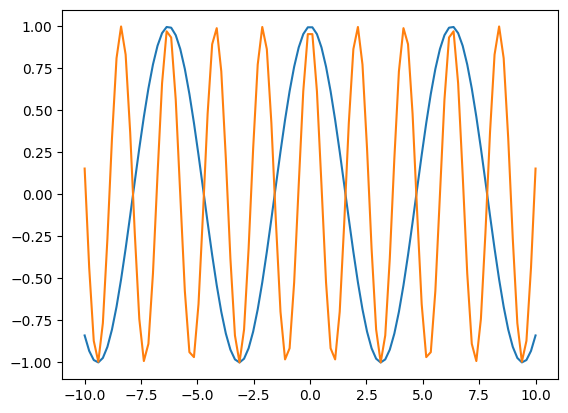

In [2]:
import numpy as np
import matplotlib.pyplot as plt
y = lambda k, x: np.cos(k * x)
fig = plt.subplots()
x = np.linspace(-10, 10, 100)
plt.plot(x, y(1, x))
plt.plot(x, y(3, x))
plt.show()

`dataekp_0.csv` можно скачать с [официального сайта](https://data.gov.ru/opendata/7703771271-ekp)

In [3]:
import pandas as pd
df = pd.read_csv('dataekp_0.csv')
df.head()

,section,subsection,title,description,start,stop,address,participants
0,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-01-18,2008-01-20,"Россия, Тульская обл. Алексин",40.0
1,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-08,2008-02-10,"Россия, Приморский край Владивосток",30.0
2,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-02-22,2008-02-24,"Россия, Тульская обл. Алексин",50.0
3,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-22,2008-02-24,"Россия, Свердловская обл. Екатеринбург",100.0
4,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-03-01,2008-03-02,"Россия, Пермская обл. Пермь",40.0


In [4]:
subdata = df[df.section == 'Авиамодельный спорт']
subdata.count()

section         1206
subsection      1206
title           1206
description     1206
start           1206
stop            1206
address         1206
participants    1206
dtype: int64

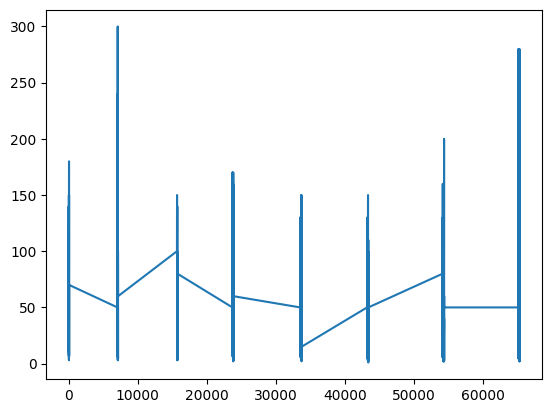

In [5]:
plt.plot(subdata.participants)
plt.show()

In [6]:
subdata.tail()

,section,subsection,title,description,start,stop,address,participants
65280,Авиамодельный спорт,Молодежный (резервный) состав,Первенство мира,класс F-3A,2015-08-06,2015-08-16,"Швейцария, -, -",2.0
65281,Авиамодельный спорт,Молодежный (резервный) состав,Первенство европы,"класс F-1A, класс F-1B, класс F-1P",2015-08-10,2015-08-16,"Румыния, -, -",13.0
65282,Авиамодельный спорт,Молодежный (резервный) состав,Первенство россии,"класс F-3B, класс F-3J",2015-08-20,2015-08-23,"Россия, Нижегородская обл. р. п. Большое К...",50.0
65283,Авиамодельный спорт,Молодежный (резервный) состав,Первенство европы,"класс F-2A, класс F-2B, класс F-2C, класс F-2D",2015-08-20,2015-08-29,"Болгария, -, -",9.0
65284,Авиамодельный спорт,Молодежный (резервный) состав,Международные соревнования,"S-3, S-4, S-6, S-7, S-8, S-9",2015-09-18,2015-09-28,"Казахстан, Байконур, -",16.0


In [7]:
subdata.max()

section                          Авиамодельный спорт
subsection                           Основной состав
title           Чемпионат южного федерального округа
description                 своднолет. мод. F-1A,B,C
start                                     2015-12-11
stop                                      2015-12-12
address                                    ЮАР, -, -
participants                                   300.0
dtype: object

In [8]:
subdata.min()


section                   Авиамодельный спорт
subsection      Молодежный (резервный) состав
title              Всероссийские соревнования
description                                 -
start                              2008-01-18
stop                               2008-01-20
address                       Австралия, -, -
participants                              1.0
dtype: object

In [10]:
df.start

0        2008-01-18
1        2008-02-08
2        2008-02-22
3        2008-02-22
4        2008-03-01
            ...    
76596    2015-04-15
76597    2015-04-24
76598    2015-06-04
76599    2015-08-15
76600    2015-12-03
Name: start, Length: 76601, dtype: object

In [12]:
pd.to_datetime(df.start)

0       2008-01-18
1       2008-02-08
2       2008-02-22
3       2008-02-22
4       2008-03-01
           ...    
76596   2015-04-15
76597   2015-04-24
76598   2015-06-04
76599   2015-08-15
76600   2015-12-03
Name: start, Length: 76601, dtype: datetime64[ns]

In [19]:
df1 = pd.to_datetime(df.start).dt.year




In [24]:
df2 = df.participants
df2

0          40.0
1          30.0
2          50.0
3         100.0
4          40.0
          ...  
76596     380.0
76597      50.0
76598      40.0
76599     150.0
76600    1140.0
Name: participants, Length: 76601, dtype: float64

In [23]:
result = pd.concat([df1, df2], axis=1, join='inner')
display(result)

,start,participants
0,2008,40.0
1,2008,30.0
2,2008,50.0
3,2008,100.0
4,2008,40.0
...,...,...
76596,2015,380.0
76597,2015,50.0
76598,2015,40.0
76599,2015,150.0


In [27]:
pivot = result.pivot_table(index =['start'], 
                       values =['participants'], 
                       aggfunc ='sum')
print(pivot)

       participants
start              
2008       777433.0
2009       868437.0
2010       913609.0
2011      1205869.0
2012      1110218.0
2013      1306532.0
2014      1395107.0
2015      1528974.0


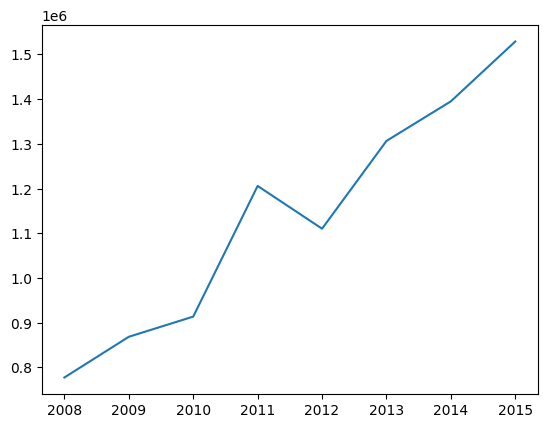

In [28]:
plt.plot(pivot)